In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [10]:
data = pd.read_csv('dataset\digikala-orders.csv')

data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [11]:
data['date'] = pd.to_datetime(data['DateTime_CartFinalize'])

data['date'] = data['date'].map(lambda date: 100*date.year + date.month)
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,date
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,201605
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0,201804
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0,201607
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0,201703
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0,201702


In [12]:
order_time = data.groupby(['date'])['Quantity_item'].sum().reset_index()

order_time

,date,Quantity_item
0,201309,7.0
1,201310,77.0
2,201311,104.0
3,201312,125.0
4,201401,156.0
...,...,...
59,201808,7944.0
60,201809,8911.0
61,201810,7311.0
62,201811,7572.0


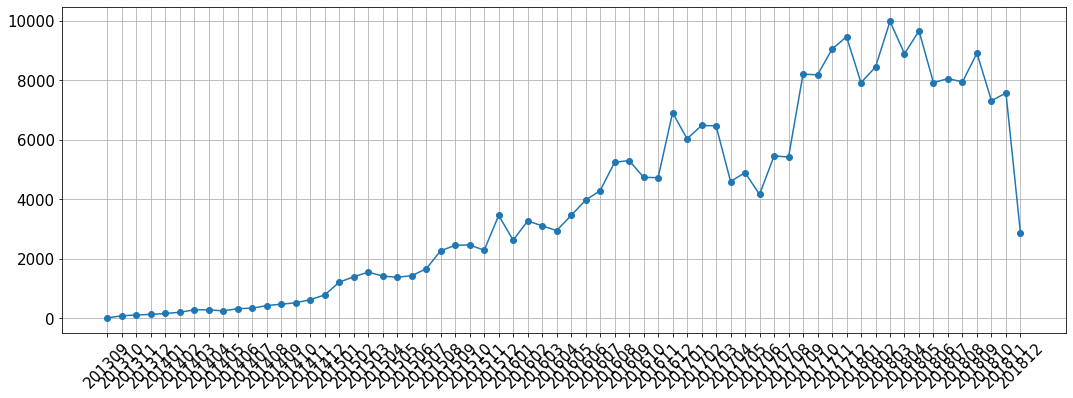

In [13]:
plt.figure(figsize=(18,6))
plt.axis()
plt.plot(order_time['date'].to_numpy(dtype=str),order_time['Quantity_item'],marker='o')
plt.grid()
plt.xticks(rotation = 45)
plt.show()

In [14]:
city_customers = data.value_counts(['city_name_fa'])

customers_min = city_customers[8:]
customers_max = city_customers[0:8]

others = customers_min.sum()
customers_max.loc[others]= others
customers_max

city_name_fa
تهران           108306
مشهد              6024
اصفهان            5992
کرج               5934
اهواز             4313
شیراز             4065
رشت               3204
تبریز             2630
59532            59532
dtype: int64

In [15]:
labels = ['تهران','مشهد','اصفهان','کرج','اهواز','شیراز','رشت','تبریز','others']
persian_labels = [get_display(reshape(label)) for label in labels]
persian_labels

['ﻥﺍﺮﻬﺗ', 'ﺪﻬﺸﻣ', 'ﻥﺎﻬﻔﺻﺍ', 'ﺝﺮﮐ', 'ﺯﺍﻮﻫﺍ', 'ﺯﺍﺮﯿﺷ', 'ﺖﺷﺭ', 'ﺰﯾﺮﺒﺗ', 'others']

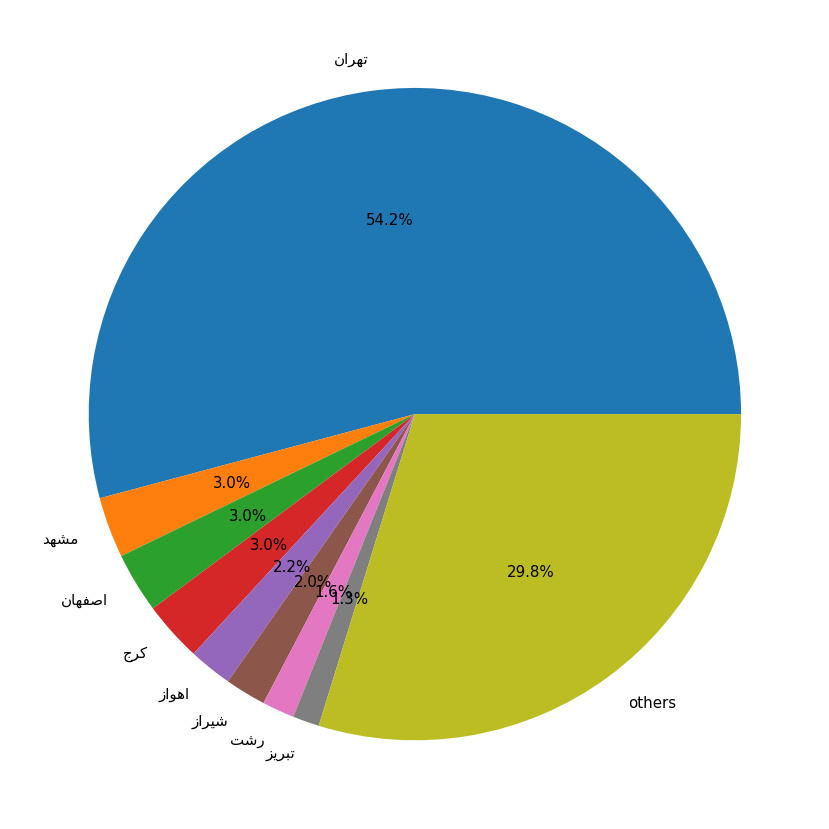

In [17]:
plt.figure(figsize=(15,15))
plt.rcParams['font.size'] = 15.0
plt.pie(customers_max,labels=persian_labels, autopct='%1.1f%%')
plt.show()